**Predicting Insurance Charges**

**Situtaion:**
To develop a system to predict annual medical charges for new health insurance customers.The project leveraged a dataset of over 1300 customer records, containing demographic, lifestyle, and actual medical charge information.

**Task:**
Developed a predictive model using linear regression to estimate medical expenditures.  Addressed challenges of varying data scales and categorical variables.

**Action:**
Performed exploratory data analysis to understand feature relationships and identify the target variable (medical charges).  Employed feature scaling (standardization) for numerical variables and one-hot encoding for categorical variables. Selected linear regression as the model and trained it using scikit-learn.  Identified smoker status, BMI, and age as the most influential predictors of medical charges.  Reserved 10% of the data for testing and evaluation.

**Result:** Successfully trained a model capable of estimating annual medical expenditures.  

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
medical_df=pd.read_csv('/content/insurance.csv')
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns
Each row of the dataset contains information about one customer
Our objective is to estimate value for charges column using information f other columns for new customer

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in any column

In [ ]:
#Some statistical properties of the data
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Min Age:18, Max Age:64

BMI=Mass of person in kg/ Square of their height in meter(kg/m^2)


Exploratory Data Analysis

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#purpose of %matplotlib inline  is that they show up as outputs within the notebook and not as pop ups


The following settings will improve font size and default style of our charts


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

**Age**

Age is a numeric column in our dataset. The minium age is 18 and the maximum age is 64. Thus we can visualise the distribution of age using a histogram with 47 bins(64-18+1 bins or one for each year) and a boxplot. We can use plotly to make chart interactive.


In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
#distribution of age using histogram
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)#plots a boxplot right above the histogram
fig.show()

The distribution of ages in the dataset is almost unoform with 20-30 customers at every age except at ages 18 and 19 which seems to have twice as many customers as at any other age.

**Body Mass Index**

Distribution of BMI of customers using a histogram and boxplot

In [ ]:
#distribution of bmi using histogram
fig=px.histogram(medical_df,x='bmi',marginal='box',nbins=47,title='Distribution of BMI',color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)#plots a boxplot right above the histogram
fig.show()

The mesuarement of BMI seems to have a Gaussian/Normal Distribution centred around the value 30.

**Charges**

Now we will visualise the distribution of charges i.e the annual medical charges of customers. This is also the column we will try to predict. We will simulateneously use a categorical column of "smoker" to diffrentiate between the charhes of smokers and non-smokers.

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['blue','grey'],title='Annual Medical Charges',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

Following insights emerge from the above graph:



1.  For most cutsomers, annual charges are below $10,000

2.  Only Small number of customers have high annual charges possibly dues to accidents. medical illness and genetic diseases. The distribution folllows a "power law".

3. There is significant difference in medical expenses of smokers and non-smokers. While the median for non soker is close to $7345 while median medical charges for smokers are close to $35,000







Now we will visualise the distribution of charges i.e the annual medical charges of customers with respect to their sex.

In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['blue','grey'],title='Annual Medical Charges',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

Following insights emerge from the above graph:


1. Majority of both males and females have annual charges less than $30,000.

2. Median Annual Charges of both males and females is also approximatley same with very less variation.




Now we will visualise the distribution of charges i.e the annual medical charges of customers with respect to their region.


In [ ]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='region',color_discrete_sequence=['blue','grey','red','green'],title='Annual Medical Charges',nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

**Smoker**

Now we can visulase the smoker  column using a histogram

In [ ]:
medical_df.smoker.describe()

,smoker
count,1338
unique,2
top,no
freq,1064


In [ ]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')


In [ ]:
px.histogram(medical_df,x='smoker',color='region',title='Smoker')

In [ ]:
px.histogram(medical_df,x='smoker',color='children',title='Smoker')

Having looked at individual columns we can now visulaise relationship of charges and other columns.

**Age and Charges**

In [ ]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8, hover_data=['sex'],title='Age and Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the folowing observations from the above graph.

The general trend seems to be that medical charges increase with age as we might expect. However there is significant variation at every age and its clear that age alone cannot be used to accuratelu determine medical charges

We can see 3 clusters of points each of wich seems to form a line with increasing slope.

The first and largets cluster consists of presumably "healthy non smokers" who have relatively low medical charges compared to others.

The second cluster contains a mix of smokers and non-smokers. It is possible that these are distinct but overlapping clusters:"non-smokers with medical issues" and "smokers without major medical issues"

The final cluster consists of smokers presumably with major medical issues that are possibly relted to or worsened by smoking.






**BMI and Charges**

In [ ]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8, hover_data=['sex'],title='BMI and Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers there does not exist and particluar relationship between BMI and medical charges.

However medical charges seems to be significantly higher for smokers with BMI greater than 30

**Charges and Children**

In [ ]:
fig=px.violin(medical_df,x='children',y='charges', title='Children and Charges')#Violin is used instead of scatter beacuse number of children is dicrete so this chart has width which tells how many values lies here and outliers
fig.update_traces(marker_size=5)
fig.show()

**Correlation**

As can be seen from the analysis, the values in some columns are more closeley related to the values in "charges" column compared to other columns eg:"age and charges" seem to grow together whereas "bmi and charges" do not.

Thsi relationship is often expressed numerically using a measure called correlation coefficient which can be compured using the .corr method in pandas.


In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

To calculate correlation using categorical columns they need to be converted to numeric columns

In [ ]:
smoker_values = {'yes':1,'no':0}
smoker_numeric=medical_df.smoker.map(smoker_values)#.map takes either a function or dictionary and apllies it to every value so here we have given a dictionary which converts no to 0 and yes to 1 .
medical_df.charges.corr( smoker_numeric)

0.787251430498478

Correlation Coefficients indicates strength and direction




**Linear Regression Using a single feature**

Smoker and Age column have the strongest correlation with charges column. We will try to estimate the value of charges by using the value of age for non smokers. First of all we will create a data for non-smokers

In [ ]:
non_smokers_df=medical_df[medical_df.smoker=='no']
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Visualising the relationship between age and charges

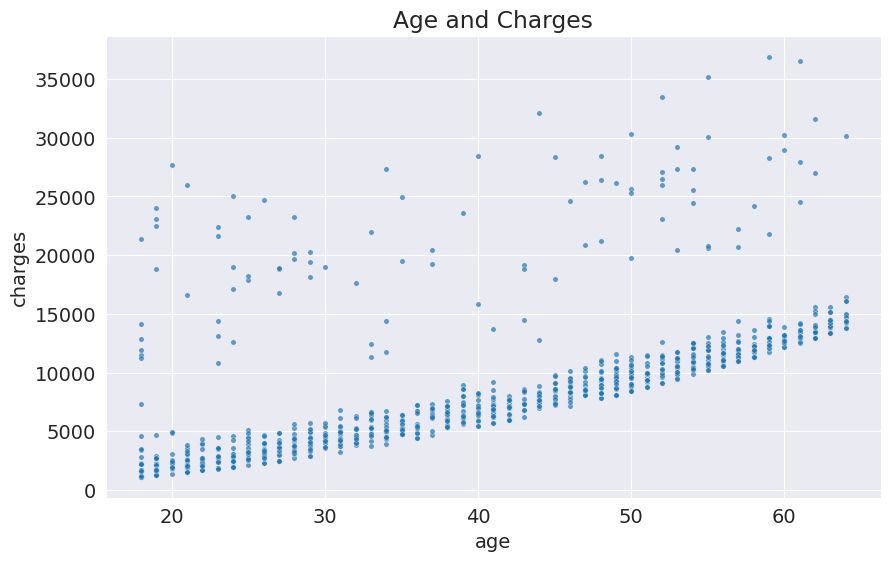

In [ ]:
plt.title('Age and Charges')
sns.scatterplot(data=non_smokers_df,x='age',y='charges', alpha=0.7, s=15);
plt.show()

Apart for general exceptions, the points seem to form a line. We will try to fit a line using these points and use it to predict changes for a given age.

A line on X&y coordinates has the following formula
y=ax+b
where b is the intercept term and a is the slope term

**Model**
In our case, x asis shows age and y axis shoes charges. Thus we will assume the following relationship bteween the two:

charges=a*age+b

We will try to determine the values of a and b that best fits the data

This is called linear regression and the model is known as a linear regression model as it will try to estimate the linear relationship between the independent varible that is age and dependent variable that is charges.



In [ ]:
def estimate_charges(age,a,b):
  return a*age+b

The estimate_charges function is our first model

In [ ]:
#guessing values of a and b to estimate charges
a=50
b=100

In [ ]:
estimate_charges(30,50,100)

1600

In [ ]:
ages = non_smokers_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges=estimate_charges(ages,a,b)
estimated_charges
#This will give the estimated values

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


These are the estimated values we received after using the function we created. Comparing them with some actual values.


In [ ]:
non_smokers_df.charges
#This will give the actual values

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


There is differnce bewteen the actual values and the estimated values and this is called as residual.


Text(0, 0.5, 'Estimated Charges')

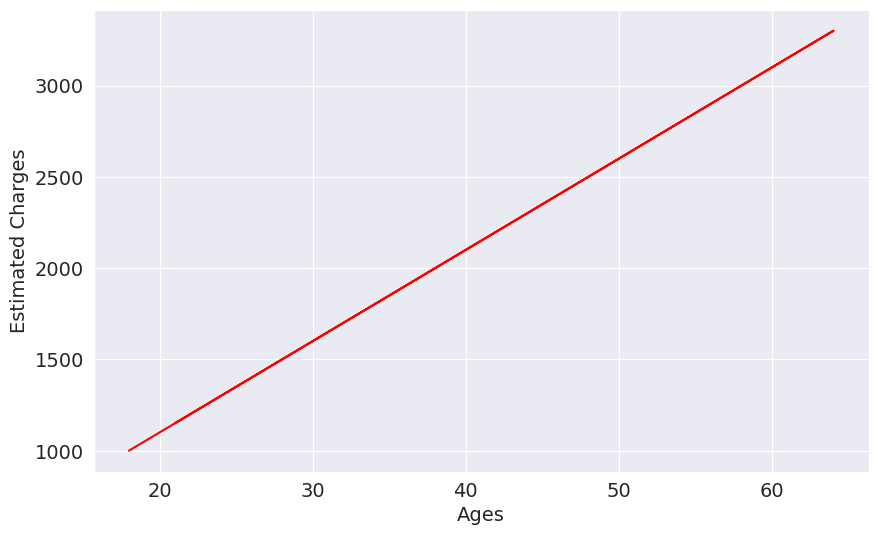

In [ ]:
#plotting age and estimated charges

plt.plot(ages,estimated_charges, 'r-');
plt.xlabel('Ages')
plt.ylabel('Estimated Charges')


To check how good out model is we will plot the obtained red line from above graph which is the estimated line on top of scatterplot of actual data

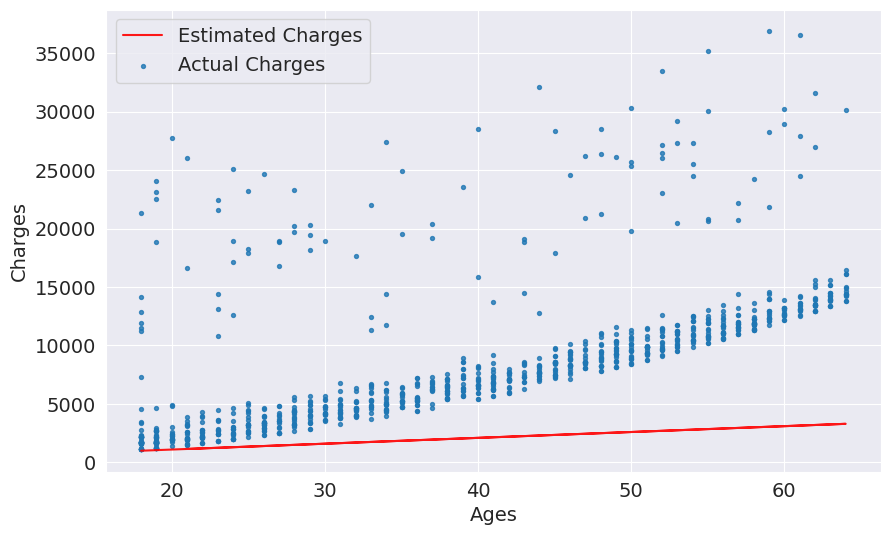

In [ ]:
#actual data that we want to predict
target=non_smokers_df.charges
#plotting estimates
plt.plot(ages,estimated_charges,'r',alpha=0.9);
#plotting scatterplot of actual data
plt.scatter(ages,target, s=8 ,alpha=0.8);
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimated Charges','Actual Charges']);




Clearly, our estimates are quite poor and the line does not fit the data very well.

**Linear Regression Using SciKit Learn**

In [ ]:


from sklearn.linear_model import LinearRegression




First we create a new model object

In [ ]:
model=LinearRegression()

 Next we can use the fit method of the model to find the best fit line for the inputs and the targets

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



Every model in scikit learn has a fit method which takes some parameters and targets. In case of linear regression, the fit method fits a line between those parameters and targets.

In [ ]:
#Creating some inputs and targets
inputs=non_smokers_df[['age']]
targets=non_smokers_df['charges']
print('inputs.shape:',inputs.shape)
print('targets.shape:',targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [ ]:
#Fitting model into the data
model.fit(inputs,targets)

LinearRegression()

We can now make predictions using the model. We will try predicting the target for ages 23, 37 and 61

In [ ]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
#computing predictions for all set of inputs
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


The parameters of the model are stored in the coef_ and intercept_ properties

In [ ]:
#a
model.coef_

array([267.24891283])

In [ ]:
#b
model.intercept_

-2091.4205565650864

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
def try_parameters(w, b):
    ages = non_smokers_df.age
    target = non_smokers_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


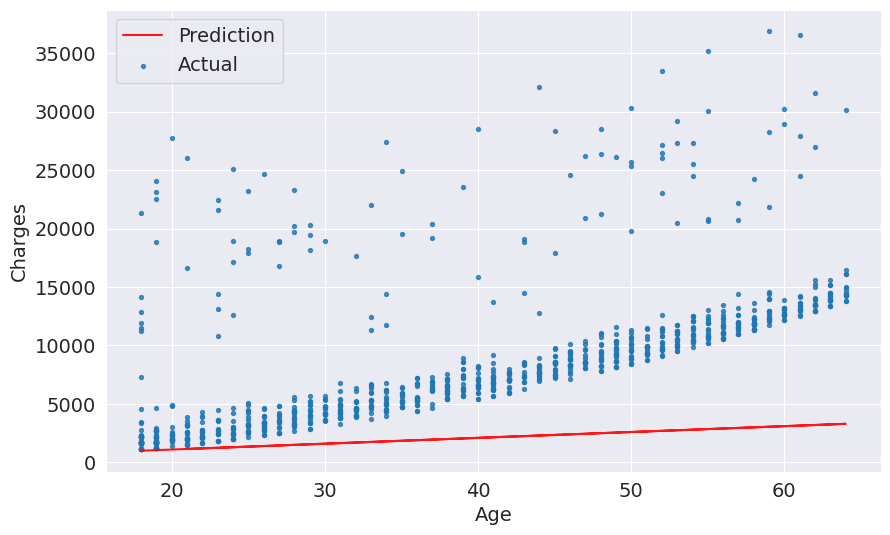

In [ ]:
try_parameters(50, 100)

RMSE Loss:  4662.505766636395


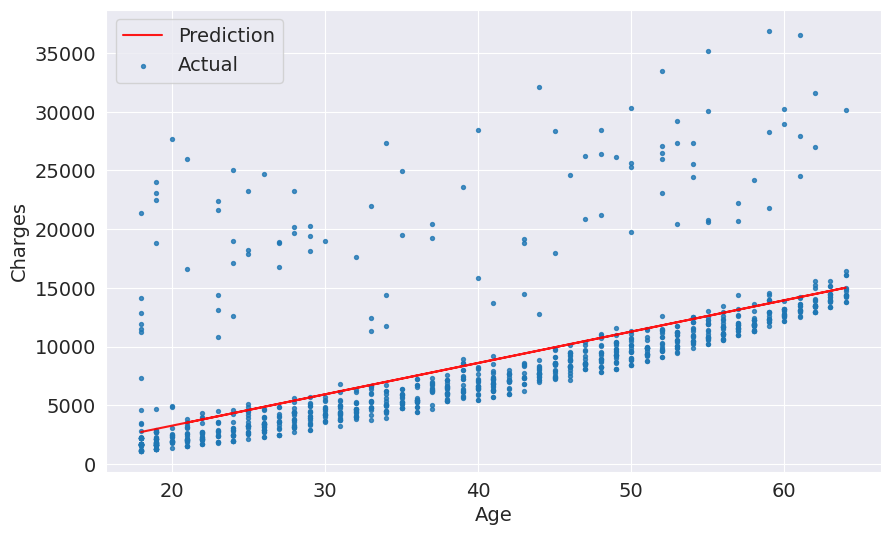

In [ ]:
try_parameters(model.coef_, model.intercept_)

 The line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers.

Multilple Regression

In [ ]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [ ]:
non_smokers_df.charges.corr(non_smokers_df.bmi)

0.0840365431283327

In [ ]:
fig = px.scatter(non_smokers_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter_3d(non_smokers_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

charges=a1​×age+a2​×bmi+a3​×children+b

In [ ]:
#correlation between charges and number of children for non smokers
non_smokers_df.charges.corr(non_smokers_df.children)

0.13892870453542192

In [ ]:
#plotting the correlation
fig = px.strip(non_smokers_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [ ]:
#creating regrassion equataion
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi', 'children']], non_smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [ ]:
#Instead of using dataframe of non smokers we will now train a linear regression model to  estimate medical charges for all customers.
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


Using Categorical Features for Machine Learning
So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.

If a categorical column has more than 2 categories, we can perform **one-hot encoding **i.e. create a new column for each category with 1s and 0s.

If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

**Binary Categories**
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
#correlation between charhes and whether person is a smokers or not
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the smoker_df column for linear regression.

charges=a1​×age+a2​×bmi+a3​×charges+a4​×smoker+b

In [ ]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.

As we increase the number of explanatory variables our model becomes better.


Let's try adding the "sex" column as well.

charges=a1​×age+a2​×bmi+a3​×charges+a4​×smoker+a5​×sex+b

<Axes: xlabel='sex', ylabel='charges'>

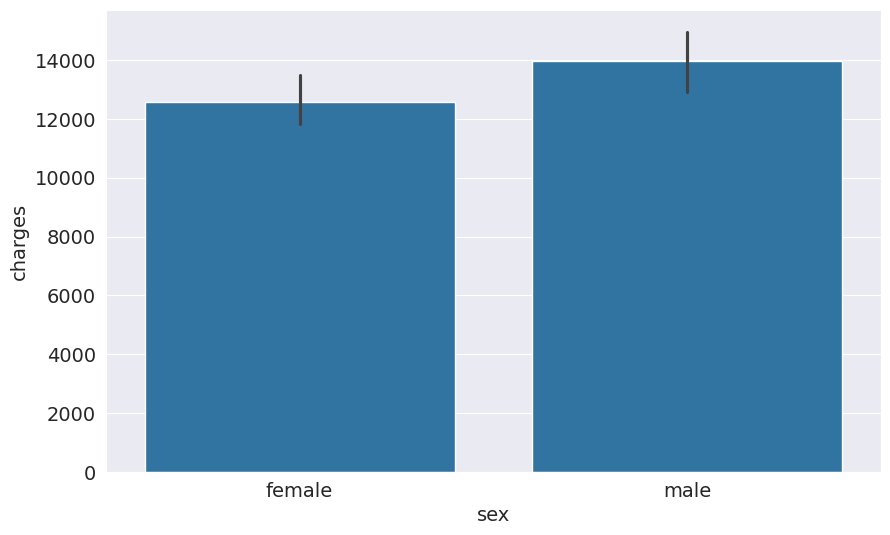

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

In [ ]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
#Creating a regression model with sex as an explanatory variable
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)


Loss: 6056.100708754546


One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

That is region southwest will become a new column and will take value 1 if the region of cutomer is soutwest and 0 if it is some other region.

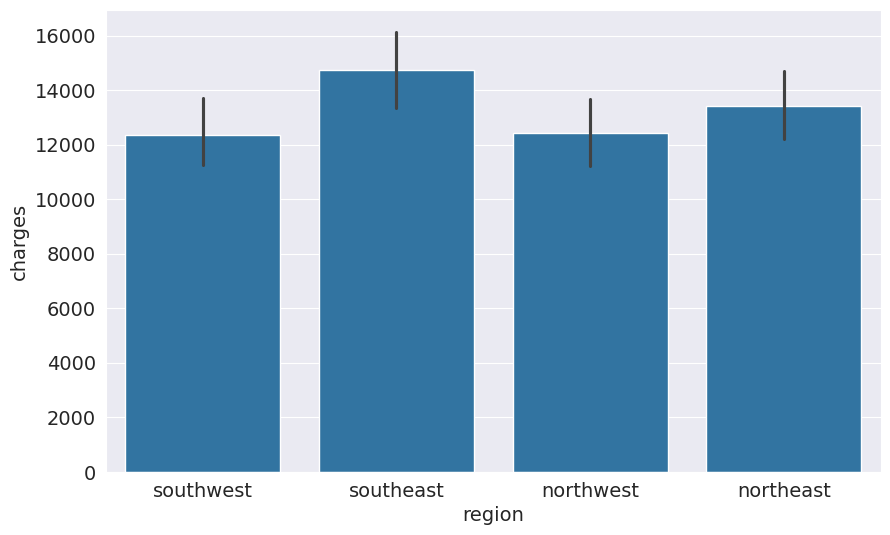

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

charges=a1​×age+a2​×bmi+a3​×charges+a4​×smoker+a5​×sex+a6​×region+b

In [ ]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


**Model Improvements**

Due to regulatory requirements, we also need to explain the rationale behind the predictions our model.

To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

-12525.547811195444

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df


,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


It's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

We can apply scaling using the StandardScaler class from scikit-learn.


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
#We can now scale data as follows:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:

#These can now we combined with the categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values


In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


We can now compare the weights in the formula:

charges=a1​×age+a2​×bmi+a3​×charges+a4​×smoker+a5​×sex+a6​×region+b

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


**Conclusion**:
The most important feature for predicting medical charges for insuarnce are:

Smoker

Age

BMI

**`Creating a Test Set`**

Models like the one we've created are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    inputs, targets, test_size=0.1, random_state=42  # Use a random state for reproducibility
)
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5681.183886386302


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)



In [ ]:
# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6082.272151066889


**Summary and Conclusions:**

1. Explored the data and found diffrent correlations between the columns or between the inputs and targets. This analysis led to identification of the target column.

2. Choose the right model(in this case we picked Linear Regression) and used Scikit Learn

3. Scaled Numerical Varibales to make it suitable for analysis so that they all have mean of zero and varinace of one.

4. Used one-hot encoding for categorical varibales

5. Identified that Smoker, BMI and Age are the most important factors while determining medical charges for a new customer.

6. Trained the model.

7. Set aside 10% of data for testing and reporting results of model.


